# Pyber Analysis - Observable Trends

* By Tim St. Onge


1. Compared with rideshare data in Rural and Suburban cities, Urban cities skew towards the lower average fares. This may be due to the fact that in dense urban areas, Pyber rides may be relatively shorter in distance, therefore making the ride fares lower.


2. As the pie charts clearly illustrate, urban areas accounted for the majority of fares and rides across the Pyber system, and were dominant in the number of drivers in that city type (at almost 81%). These metrics suggest, perhaps unsurprisingly, that urban areas have both high supply (number of drivers) and high demand (proportion of fares/number of rides) in the Pyber system. 


3. While most fare revenue is concentrated in Urban areas, Suburban and Rural areas recorded higher average fares. While several Rural locations recorded the highest average fares (over $40) average fares in Suburban and Rural areas were fairly similar, as indicated by the scatterplot. Drivers positioned in some of these Suburban markets could perhaps do quite well financially with higher per-ride fare prices.

In [11]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
complete_data = pd.merge(ride_data, city_data, how= "left", on=["city", "city"])

# Display the data table for preview
complete_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

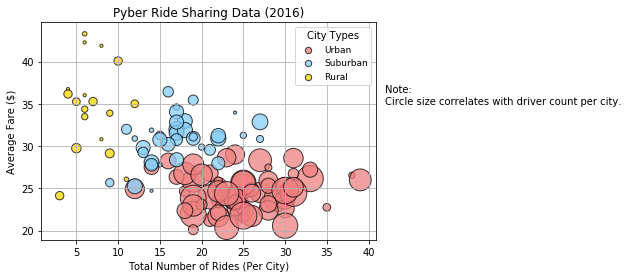

In [12]:
# Group the complete dataset by City name
complete_data_city = complete_data.groupby(['city'])

# Calculate the average fare per city
average_fare = complete_data_city["fare"].mean()

# Calculate the number of rides in each city
rides_per_city = complete_data_city["ride_id"].count()

# Create a sorted list of the full dataset, osrted by city name
city_sorted = city_data.sort_values(['city'])

# Store the city type (urban, suburban, or rural) for each city
city_type = city_sorted['type'].values

# Store the number of drivers in each city
num_of_drivers = city_sorted['driver_count'].values

# Combine each data series into a Data Frame
ride_share_data = pd.DataFrame({"Total Rides": rides_per_city,
                                "Average Fare": average_fare,
                                "City Type": city_type,
                                "Driver Count": num_of_drivers
    })


# Filter out the ride share data to only "urban" cities and store each ride metric
urban_rideshare = ride_share_data.loc[ride_share_data["City Type"] == "Urban", :]
urban_rides_per_city = urban_rideshare['Total Rides'].values
urban_average_fare = urban_rideshare['Average Fare'].values
urban_num_of_drivers = urban_rideshare['Driver Count'].values

# Filter out the ride share data to only "suburban" cities and store each ride metric
suburban_rideshare = ride_share_data.loc[ride_share_data["City Type"] == "Suburban", :]
suburban_rides_per_city = suburban_rideshare['Total Rides'].values
suburban_average_fare = suburban_rideshare['Average Fare'].values
suburban_num_of_drivers = suburban_rideshare['Driver Count'].values

# Filter out the ride share data to only "rural" cities and store each ride metric
rural_rideshare = ride_share_data.loc[ride_share_data["City Type"] == "Rural", :]
rural_rides_per_city = rural_rideshare['Total Rides'].values
rural_average_fare = rural_rideshare['Average Fare'].values
rural_num_of_drivers = rural_rideshare['Driver Count'].values


# Create a scatter plot layer for each city type's data/metrics, with various display characteristics.
plt.scatter(urban_rides_per_city, urban_average_fare, marker="o", c= "lightcoral", edgecolors="black",
            s=urban_num_of_drivers*10, alpha=0.75, label = "Urban")

plt.scatter(suburban_rides_per_city, suburban_average_fare, marker="o", c= "lightskyblue", edgecolors="black",
            s=suburban_num_of_drivers*10, alpha=0.75, label = "Suburban")

plt.scatter(rural_rides_per_city, rural_average_fare, marker="o", c= "gold", edgecolors="black",
            s=rural_num_of_drivers*10, alpha=0.75, label="Rural")


# Set scatter plot settings, including grid, x-label, y-label, and graph title
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")


# Establish parameters for the legend, including making all symbol sizes the same.
lgnd = plt.legend(title="City Types", loc="upper right", fontsize=9)
for x in lgnd.legendHandles:
    x.set_sizes([40.0])

    
# Define the annotation text and add the text to the plot
annotation_text = """Note:
Circle size correlates with driver count per city."""
plt.annotate(annotation_text, xy=(30,30), xytext=(42,35))


# Display the scatter plot
plt.show()

## Total Fares by City Type

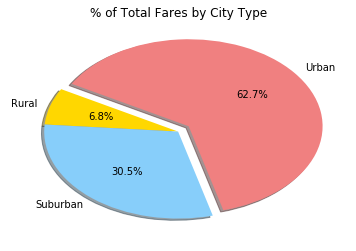

In [13]:
# Locate and separate all fares from the complete dataset that occur in "Urban" areas, then sum the fares
urban_fares_all = complete_data.loc[complete_data["type"] == "Urban", "fare"]
urban_fares_sum = urban_fares_all.sum()

# Locate and separate all fares from the complete dataset that occur in "Suburban" areas, then sum the fares
suburban_fares_all = complete_data.loc[complete_data["type"] == "Suburban", "fare"]
suburban_fares_sum = suburban_fares_all.sum()

# Locate and separate all fares from the complete dataset that occur in "Rural" areas, then sum the fares
rural_fares_all = complete_data.loc[complete_data["type"] == "Rural", "fare"]
rural_fares_sum = rural_fares_all.sum()

# Set pie chart variables, including labels, color, exploding, and fares
labels = ["Urban", "Rural", "Suburban"]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = [0.1, 0, 0]
fares = [urban_fares_sum, rural_fares_sum, suburban_fares_sum]

# Create the pie chart with the aforementioned variables and formatting parameters
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=285)
plt.title("% of Total Fares by City Type")

# Save the "% of Total Fares by City Type" figure
plt.savefig("../Images/TotalFares.png")

# Show the chart
plt.show()



## Total Rides by City Type

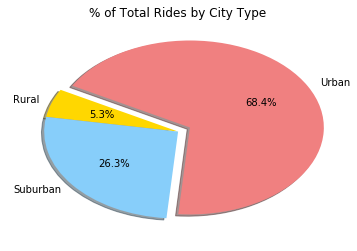

In [14]:
# Calculate the total sum of rides for each city type
urban_rides = urban_rideshare["Total Rides"].sum()
suburban_rides = suburban_rideshare["Total Rides"].sum()
rural_rides = rural_rideshare["Total Rides"].sum()

# Set pie chart variables, including labels, color, exploding, and rides
labels = ["Urban", "Rural", "Suburban"]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = [0.1, 0, 0]
rides = [urban_rides, rural_rides, suburban_rides]

# Create the pie chart with the aforementioned variables and formatting parameters
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=265)
plt.title("% of Total Rides by City Type")

# Save the "% of Total Rides by City Type" figure
plt.savefig("../Images/TotalRides.png")

# Show the chart.
plt.show()



## Total Drivers by City Type

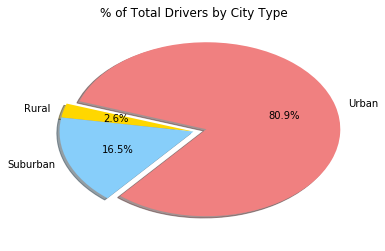

In [15]:
# Calculate the total sum of drivers for each city type
urban_drivers = urban_rideshare["Driver Count"].sum()
suburban_drivers = suburban_rideshare["Driver Count"].sum()
rural_drivers = rural_rideshare["Driver Count"].sum()

# Set pie chart variables, including labels, color, exploding, and drivers
labels = ["Urban", "Rural", "Suburban"]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = [0.1, 0, 0]
drivers = [urban_drivers, rural_drivers, suburban_drivers]

# Create the pie chart with the aforementioned variables and formatting parameters
plt.pie(drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=230)
plt.title("% of Total Drivers by City Type")

# Save the "% of Total Drivers by City Type" figure
plt.savefig("../Images/TotalDrivers.png")

# Show the chart
plt.show()
